<a href="https://colab.research.google.com/github/manisha-dhanuka/Linear-Regression/blob/main/yes_bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
stock_price = pd.read_csv("/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv")

In [3]:
stock_price.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [18]:
stock_price.set_index('Date',inplace=True)

In [19]:
stock_price

,Open,High,Low,Close
Date,,,,
Jul-05,13.00,14.00,11.25,12.46
Aug-05,12.58,14.88,12.55,13.42
Sep-05,13.48,14.87,12.27,13.30
Oct-05,13.20,14.47,12.40,12.99
Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...
Jul-20,25.60,28.30,11.10,11.95
Aug-20,12.00,17.16,11.85,14.37
Sep-20,14.30,15.34,12.75,13.15


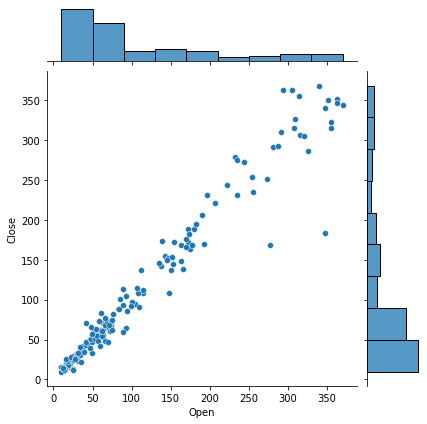

In [11]:
sns.jointplot(data = stock_price, x='Open', y= 'Close')

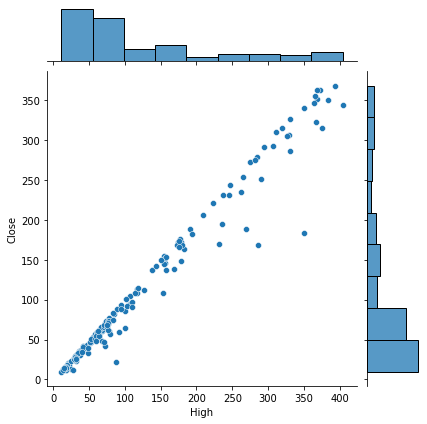

In [12]:
sns.jointplot(data = stock_price, x='High', y= 'Close')

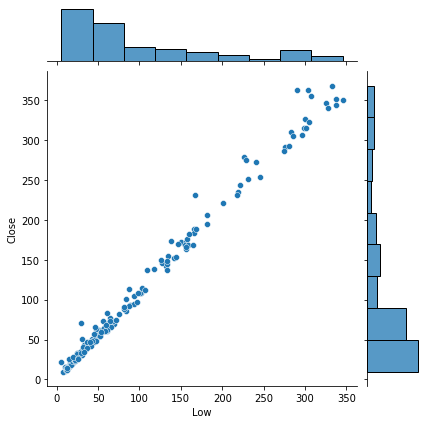

In [13]:
sns.jointplot(data = stock_price, x='Low', y= 'Close')

In [20]:
X = stock_price.drop('Close', axis=1)
y = stock_price["Close"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
regress= LinearRegression()

In [23]:
regress.fit(X_train,y_train)

LinearRegression()

In [24]:
predicted_close = regress.predict(X_test)

In [25]:
print(predicted_close)

[ 29.83355878  14.68678086 378.00120607 130.26504655 314.41110213
  23.21302226  39.88638607  61.82503372 165.99641748  67.46521961
  47.81826351 202.13082646  66.79067093  36.39297436  15.89451916
  26.44378403  46.25622638  25.02174252  61.69655774  51.82582963
 184.93211123 152.58381782 376.360921    36.94538489  19.28157366
 134.61417987  59.86342522  32.84189444  53.02440071 147.06450844
  57.8059216   48.14934985 165.95810763 260.60147661  52.46818464
  51.8947312   45.64552589  62.24350901  52.01241888  48.54794816
  15.63570271  14.88754627 232.65674116 105.340374   325.3167687
  78.14017442 114.24832998  25.26380572 165.91961318  67.95659085
  55.54427404 235.62713063  14.10452941 268.2697825   24.71404975
  44.87571859 337.96600816  69.04504188 351.34945916  39.77051826
 187.36327287  27.10980191]


In [26]:
y.mean()

105.2047027027027

In [27]:
predicted_close.mean()

107.25483537330896

In [28]:
test_residuals = y_test - predicted_close

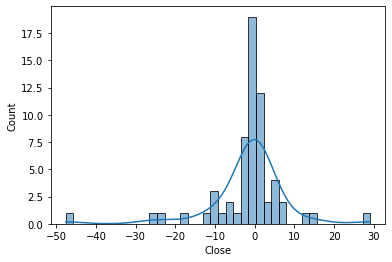

In [30]:
sns.histplot(test_residuals ,kde = True)

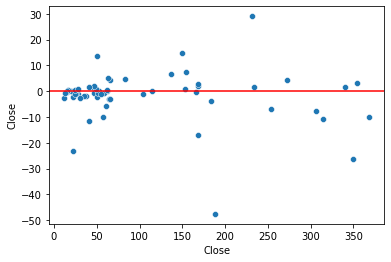

In [33]:
sns.scatterplot(x= y_test, y= test_residuals )
plt.axhline(y=0, color = 'red')

In [34]:
mean_absolute_error( y_test, predicted_close)

5.189340520822177

In [35]:
mean_squared_error( y_test, predicted_close)

95.5240786451492

In [36]:
# Root mean squared error:
np.sqrt(mean_squared_error( y_test, predicted_close))

9.773642035861002